In [2]:
# Import necessary libraries to manage the information
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd
import numpy as np

# Import library of firebase
import firebase_admin
from firebase_admin import credentials, firestore

if not firebase_admin._apps:
    cred = credentials.Certificate('senecard-aafad-firebase-adminsdk-39ohd-29191d9ca9.json')
    firebase_admin.initialize_app(cred)

db = firestore.client()

Registers added successfully!


## **Implementation Business Question JEFFERSON**

*What is the average time taken to load the recommended advertisements and stores for the users?*

The average load time for advertisements and store information is crucial for app performance. Faster load times ensure smooth user experience and efficient resource use, while slow loading can signal inefficiencies and negatively impact performance.

These metrics were obtained from the homepage of the Uniandes member view, where each time the application is launched, the stores and ads recommended by us are loaded through an implemented recommendation algorithm. The measurement is taken from the moment the homepage view is accessed until the recommendations are finally displayed. This measurement is recorded in milliseconds and stored in a collection in Firebase.

Average Time for Stores: 2913.60 ms
Average Time for Advertisements: 6091.20 ms


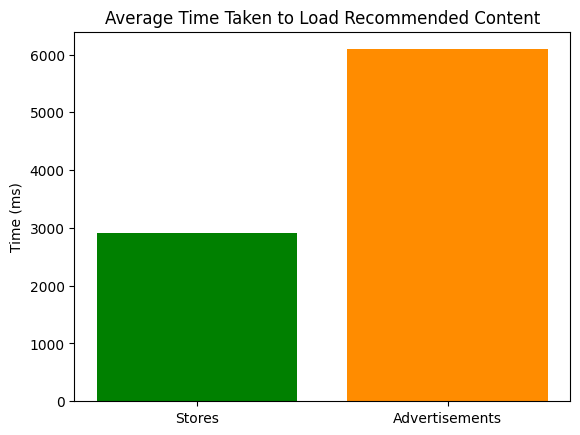

In [5]:
# Fetch data from Firebase
def fetch_data_from_firestore():
    collection_ref = db.collection('AnalyticsBusinessQuestions').document('sprint4').collection('businessQuestion2')
    docs = collection_ref.stream()

    data = []
    for doc in docs:
        doc_data = doc.to_dict()
        data.append(doc_data)
    return data

# Load data into a DataFrame
data = fetch_data_from_firestore()
df = pd.DataFrame(data)

# Ensure correct data types
df['TimeStores'] = pd.to_numeric(df['TimeStores'], errors='coerce')
df['TimeAdvertisements'] = pd.to_numeric(df['TimeAdvertisements'], errors='coerce')

# Calculate averages
average_stores = df['TimeStores'].mean()
average_ads = df['TimeAdvertisements'].mean()

# Display results
print(f"Average Time for Stores: {average_stores:.2f} ms")
print(f"Average Time for Advertisements: {average_ads:.2f} ms")

# Plot the averages with more solid colors
labels = ['Stores', 'Advertisements']
averages = [average_stores, average_ads]

plt.bar(labels, averages, color=['green', 'darkorange'])  # Usando colores más sólidos
plt.title('Average Time Taken to Load Recommended Content')
plt.ylabel('Time (ms)')
plt.show()